In [107]:
# load and summarize the dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn.metrics import roc_auc_score, roc_curve
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [103]:
df = pd.read_csv('train.csv')
X = df.drop(['CLASS', 'LIQUOR ITEM'], axis = 1)
X = X.astype(str)
y = df.CLASS

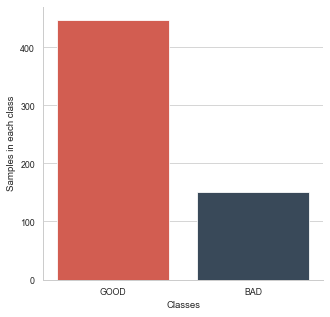

In [155]:
sns.set_style('whitegrid')
sns.set_palette(fatui)
sns.set_context('paper')

g = sns.catplot(x = 'CLASS' , data = df, kind = 'count', height = 4.5, aspect = 1 )
g.set(xlabel = 'Classes', ylabel ='Samples in each class')
plt.savefig('Class distribution.eps', format='eps')
plt.show()

In [113]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    fileord = 'Ordinal.sav'
    pickle.dump(oe, open(fileord, 'wb'))
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [114]:
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    fileordlab = 'Ordinallab.sav'
    pickle.dump(le, open(fileordlab, 'wb'))
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [5]:
#Basic SVM
def svm_func(X_train, X_test, y_train, y_test):
    svm = SVC(probability = True, kernel = 'linear')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    y_prob = svm.predict_proba(X_test)[:,1]
    print(svm.score(X_test,y_test))
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(log_loss(y_test,y_prob))
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    print("AUC of ROC Curve:", roc_auc)
    print(len(fpr))
    return fpr, tpr

In [108]:
#Tuned SVM
def svm_func_tuned(X_train, X_test, y_train, y_test):
    # Instantiate the GridSearchCV object and run the search
    parameters = {'C':[0.1, 1, 10]}
    svm = SVC(kernel = 'rbf', probability = True)
    searcher = GridSearchCV(svm, parameters, cv = 5)
    searcher.fit(X_train, y_train)
    filename = 'finalized_model.sav'
    pickle.dump(searcher, open(filename, 'wb'))
    y_pred = searcher.predict(X_test)
    y_prob = searcher.predict_proba(X_test)[:,1]

    # Report the best parameters and the corresponding score
    print("Best CV params", searcher.best_params_)
    print("Best CV accuracy", searcher.best_score_)

    # Report the test accuracy using these best parameters
    print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(log_loss(y_test, y_prob))
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    print("AUC of ROC Curve:", roc_auc)
    print(len(fpr))
    return fpr, tpr

In [86]:
#Basic LogisticRegression
def logreg_func(X_train, X_test, y_train, y_test):
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_prob = logreg.predict_proba(X_test)[:,1]
    print(logreg.score(X_train,y_train))
    print(logreg.score(X_test,y_test))
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(log_loss(y_test,y_prob))
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    print("AUC of ROC Curve:", roc_auc)
    return fpr, tpr

In [118]:
#Tuned LogisticRegression
def logreg_func_tuned(X_train, X_test, y_train, y_test):
    c_space = np.logspace(-5, 8, 15)
    param_grid = {'solver' :['liblinear', 'saga']}
    
    logreg = LogisticRegression(penalty = 'l1')
    logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
    logreg_cv.fit(X_train, y_train)
    y_pred = logreg_cv.predict(X_test)
    y_prob= logreg_cv.predict_proba(X_test)[:,1]

    # Report the best parameters and the corresponding score
    print("Best CV params", logreg_cv.best_params_)
    print("Best CV accuracy", logreg_cv.best_score_)

    # Report the test accuracy using these best parameters
    print("Test accuracy of best grid search hypers:", logreg_cv.score(X_test, y_test))
    print(logreg_cv.score(X_train,y_train))

    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(log_loss(y_test, y_prob))
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    print("AUC of ROC Curve:", roc_auc)
    return fpr, tpr

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 4, stratify = y)

In [116]:
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

In [117]:
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [13]:
svm_func(X_train_enc, X_test_enc, y_train_enc, y_test_enc)

0.9
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.92      0.94      0.93        90

    accuracy                           0.90       120
   macro avg       0.87      0.86      0.86       120
weighted avg       0.90      0.90      0.90       120

[[23  7]
 [ 5 85]]
0.3157137954750303
AUC of ROC Curve: 0.9051851851851853
28


(array([0.        , 0.        , 0.        , 0.03333333, 0.03333333,
        0.06666667, 0.06666667, 0.1       , 0.1       , 0.1       ,
        0.1       , 0.13333333, 0.13333333, 0.16666667, 0.16666667,
        0.2       , 0.2       , 0.23333333, 0.23333333, 0.33333333,
        0.33333333, 0.4       , 0.4       , 0.7       , 0.7       ,
        0.76666667, 0.76666667, 1.        ]),
 array([0.        , 0.01111111, 0.13333333, 0.13333333, 0.2       ,
        0.2       , 0.7       , 0.7       , 0.73333333, 0.75555556,
        0.84444444, 0.84444444, 0.86666667, 0.86666667, 0.91111111,
        0.91111111, 0.92222222, 0.92222222, 0.95555556, 0.95555556,
        0.96666667, 0.96666667, 0.97777778, 0.97777778, 0.98888889,
        0.98888889, 1.        , 1.        ]))

In [112]:
svm_func_tuned(X_train_enc, X_test_enc, y_train_enc, y_test_enc)

/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Nafees/anaconda3/lib/python3.7/site-packages/

Best CV params {'C': 1}
Best CV accuracy 0.9123173277661796
Test accuracy of best grid search hypers: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.95      0.97      0.96        90

    accuracy                           0.93       120
   macro avg       0.92      0.90      0.91       120
weighted avg       0.93      0.93      0.93       120

[[25  5]
 [ 3 87]]
0.2806233421168033
AUC of ROC Curve: 0.9274074074074075
18


/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03333333, 0.03333333, 0.06666667, 0.06666667, 0.13333333,
        0.13333333, 0.16666667, 0.16666667, 0.6       , 0.6       ,
        0.8       , 0.8       , 1.        ]),
 array([0.        , 0.01111111, 0.07777778, 0.1       , 0.4       ,
        0.4       , 0.48888889, 0.48888889, 0.76666667, 0.76666667,
        0.9       , 0.9       , 0.96666667, 0.96666667, 0.98888889,
        0.98888889, 1.        , 1.        ]))

In [87]:
fpr_log, tpr_log = logreg_func(X_train_enc, X_test_enc, y_train_enc, y_test_enc)

0.9311064718162839
0.8916666666666667
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.91      0.96      0.93        90

    accuracy                           0.89       120
   macro avg       0.87      0.83      0.85       120
weighted avg       0.89      0.89      0.89       120

[[21  9]
 [ 4 86]]
0.31236123684931566
AUC of ROC Curve: 0.9070370370370371


/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_ite

Best CV params {'solver': 'liblinear'}
Best CV accuracy 0.9269311064718163
Test accuracy of best grid search hypers: 0.9
0.9311064718162839
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.91      0.96      0.93        90

    accuracy                           0.90       120
   macro avg       0.88      0.84      0.86       120
weighted avg       0.90      0.90      0.90       120

[[22  8]
 [ 4 86]]
0.3110310636440799
AUC of ROC Curve: 0.9059259259259259


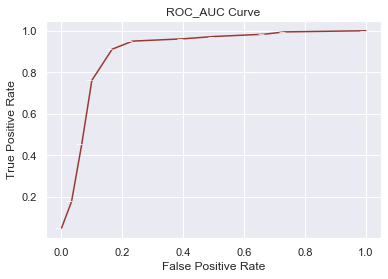

None


In [119]:
fpr_logtune, tpr_logtune = logreg_func_tuned(X_train_enc, X_test_enc, y_train_enc, y_test_enc)

In [61]:
fpr_logreg = np.delete(fpr_log, [3, 16])

In [63]:
tpr_logreg = np.delete(tpr_log, [3, 16])

In [64]:
algo_log = []
for i in range(0,26):
    algo_log.append('logistic_reg')
    
    
algo_logtune = []
for i in range(0,26):
    algo_logtune.append('tuned_logreg')

In [65]:
keys_log = ['FPRL', 'TPRL', 'AlgorithmL']
values_log = [fpr_logreg, tpr_logreg, algo_log]
log_l = dict(zip(keys_log, values_log))
print(log_l)

{'FPRL': array([0.        , 0.        , 0.        , 0.03333333, 0.06666667,
       0.06666667, 0.1       , 0.1       , 0.1       , 0.1       ,
       0.13333333, 0.13333333, 0.16666667, 0.16666667, 0.2       ,
       0.26666667, 0.26666667, 0.5       , 0.5       , 0.53333333,
       0.53333333, 0.63333333, 0.63333333, 0.73333333, 0.73333333,
       1.        ]), 'TPRL': array([0.        , 0.01111111, 0.12222222, 0.28888889, 0.28888889,
       0.65555556, 0.65555556, 0.76666667, 0.78888889, 0.87777778,
       0.87777778, 0.9       , 0.9       , 0.92222222, 0.92222222,
       0.94444444, 0.95555556, 0.95555556, 0.96666667, 0.96666667,
       0.97777778, 0.97777778, 0.98888889, 0.98888889, 1.        ,
       1.        ]), 'AlgorithmL': ['logistic_reg', 'logistic_reg', 'logistic_reg', 'logistic_reg', 'logistic_reg', 'logistic_reg', 'logistic_reg', 'logistic_reg', 'logistic_reg', 'logistic_reg', 'logistic_reg', 'logistic_reg', 'logistic_reg', 'logistic_reg', 'logistic_reg', 'logistic_reg', 

In [66]:
keys_logtune = ['FPRL', 'TPRL', 'AlgorithmL']
values_logtune = [fpr_logtune, tpr_logtune, algo_logtune]
log_tune = dict(zip(keys_logtune, values_logtune))
print(log_tune)

{'FPRL': array([0.        , 0.        , 0.        , 0.03333333, 0.03333333,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.1       ,
       0.1       , 0.1       , 0.1       , 0.16666667, 0.16666667,
       0.23333333, 0.23333333, 0.4       , 0.4       , 0.5       ,
       0.5       , 0.66666667, 0.66666667, 0.73333333, 0.73333333,
       1.        ]), 'TPRL': array([0.        , 0.01111111, 0.13333333, 0.13333333, 0.22222222,
       0.22222222, 0.46666667, 0.48888889, 0.63333333, 0.63333333,
       0.75555556, 0.77777778, 0.87777778, 0.87777778, 0.94444444,
       0.94444444, 0.95555556, 0.95555556, 0.96666667, 0.96666667,
       0.97777778, 0.97777778, 0.98888889, 0.98888889, 1.        ,
       1.        ]), 'AlgorithmL': ['tuned_logreg', 'tuned_logreg', 'tuned_logreg', 'tuned_logreg', 'tuned_logreg', 'tuned_logreg', 'tuned_logreg', 'tuned_logreg', 'tuned_logreg', 'tuned_logreg', 'tuned_logreg', 'tuned_logreg', 'tuned_logreg', 'tuned_logreg', 'tuned_logreg', 'tuned_logreg', 

In [67]:
loglist = [log_l, log_tune]
logdict = {}
for k in log_l.keys():
    logdict[k] = np.concatenate(list(logdict[k] for logdict in loglist))

In [68]:
logdict

{'FPRL': array([0.        , 0.        , 0.        , 0.03333333, 0.06666667,
        0.06666667, 0.1       , 0.1       , 0.1       , 0.1       ,
        0.13333333, 0.13333333, 0.16666667, 0.16666667, 0.2       ,
        0.26666667, 0.26666667, 0.5       , 0.5       , 0.53333333,
        0.53333333, 0.63333333, 0.63333333, 0.73333333, 0.73333333,
        1.        , 0.        , 0.        , 0.        , 0.03333333,
        0.03333333, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
        0.1       , 0.1       , 0.1       , 0.1       , 0.16666667,
        0.16666667, 0.23333333, 0.23333333, 0.4       , 0.4       ,
        0.5       , 0.5       , 0.66666667, 0.66666667, 0.73333333,
        0.73333333, 1.        ]),
 'TPRL': array([0.        , 0.01111111, 0.12222222, 0.28888889, 0.28888889,
        0.65555556, 0.65555556, 0.76666667, 0.78888889, 0.87777778,
        0.87777778, 0.9       , 0.9       , 0.92222222, 0.92222222,
        0.94444444, 0.95555556, 0.95555556, 0.96666667, 0.96666667

In [69]:
df_3 = pd.DataFrame(logdict)

In [71]:
df_3.head()

,FPRL,TPRL,AlgorithmL
0,0.000000,0.000000,logistic_reg
1,0.000000,0.011111,logistic_reg
2,0.000000,0.122222,logistic_reg
3,0.033333,0.288889,logistic_reg
4,0.066667,0.288889,logistic_reg


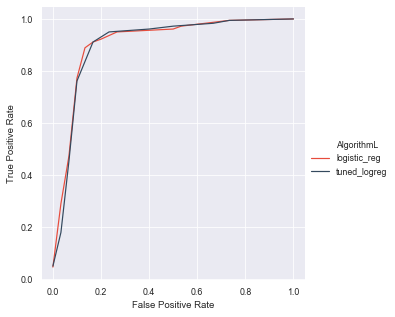

In [153]:
fatui = ["#e74c3c", "#34495e"]
sns.set_style('darkgrid')
sns.set_palette(fatui)
sns.set_context('paper')

g = sns.relplot(x = 'FPRL', y = 'TPRL' , data = df_3, kind = 'line', style='AlgorithmL', hue = 'AlgorithmL', ci = None, dashes = False, height = 4.5, aspect = 1)
g.set(xlabel = 'False Positive Rate', ylabel ='True Positive Rate')
plt.savefig('Roc log.eps', format='eps')
plt.show()

In [17]:
fpr_sv, tpr_sv = svm_func(X_train_enc, X_test_enc, y_train_enc, y_test_enc)

0.9
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.92      0.94      0.93        90

    accuracy                           0.90       120
   macro avg       0.87      0.86      0.86       120
weighted avg       0.90      0.90      0.90       120

[[23  7]
 [ 5 85]]
0.31388266970607775
AUC of ROC Curve: 0.9051851851851853
28


In [18]:
fpr_svm, tpr_svm = svm_func_tuned(X_train_enc, X_test_enc, y_train_enc, y_test_enc)

/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Nafees/anaconda3/lib/python3.7/site-packages/

Best CV params {'C': 1}
Best CV accuracy 0.9123173277661796
Test accuracy of best grid search hypers: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.95      0.97      0.96        90

    accuracy                           0.93       120
   macro avg       0.92      0.90      0.91       120
weighted avg       0.93      0.93      0.93       120

[[25  5]
 [ 3 87]]
0.2829341856580417
AUC of ROC Curve: 0.9274074074074075
18


/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/Nafees/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
fpr_list= [0.        , 0.          , 0.03333333,
        0.06666667, 0.06666667, 0.1       , 0.1       , 
        0.13333333, 0.16666667, 0.16666667,
        0.2       , 0.23333333, 0.33333333,
        0.33333333, 0.7       , 0.7       ,
        0.76666667, 1.        ]

tpr_list = [0.        , 0.01111111, 0.13333333,
        0.2       , 0.7       , 0.7       , 0.73333333, 
        0.84444444, 0.86666667, 0.91111111,
        0.92222222, 0.92222222, 0.95555556,
        0.96666667, 0.97777778, 0.98888889,
        1.        , 1.        ]
len(fpr_list)
len(tpr_list)

18

In [20]:
algo = []
for i in range(0,18):
    algo.append('linear_svm')


In [21]:
keys = ['FPR', 'TPR', 'Algorithm']
values = [fpr_list, tpr_list, algo]
sv_l = dict(zip(keys, values))
print(sv_l)

{'FPR': [0.0, 0.0, 0.03333333, 0.06666667, 0.06666667, 0.1, 0.1, 0.13333333, 0.16666667, 0.16666667, 0.2, 0.23333333, 0.33333333, 0.33333333, 0.7, 0.7, 0.76666667, 1.0], 'TPR': [0.0, 0.01111111, 0.13333333, 0.2, 0.7, 0.7, 0.73333333, 0.84444444, 0.86666667, 0.91111111, 0.92222222, 0.92222222, 0.95555556, 0.96666667, 0.97777778, 0.98888889, 1.0, 1.0], 'Algorithm': ['linear_svm', 'linear_svm', 'linear_svm', 'linear_svm', 'linear_svm', 'linear_svm', 'linear_svm', 'linear_svm', 'linear_svm', 'linear_svm', 'linear_svm', 'linear_svm', 'linear_svm', 'linear_svm', 'linear_svm', 'linear_svm', 'linear_svm', 'linear_svm']}


In [22]:
algo_m = []
for i in range(0,18):
    algo_m.append('tuned_svm')

In [23]:
len(algo_m)

18

In [24]:
keyst = ['FPR', 'TPR', 'Algorithm']
valuest = [fpr_svm, tpr_svm, algo_m]
sv_r = dict(zip(keyst, valuest))
print(sv_r)

{'FPR': array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03333333, 0.03333333, 0.06666667, 0.06666667, 0.13333333,
       0.13333333, 0.16666667, 0.16666667, 0.6       , 0.6       ,
       0.8       , 0.8       , 1.        ]), 'TPR': array([0.        , 0.01111111, 0.07777778, 0.1       , 0.4       ,
       0.4       , 0.48888889, 0.48888889, 0.76666667, 0.76666667,
       0.9       , 0.9       , 0.96666667, 0.96666667, 0.98888889,
       0.98888889, 1.        , 1.        ]), 'Algorithm': ['tuned_svm', 'tuned_svm', 'tuned_svm', 'tuned_svm', 'tuned_svm', 'tuned_svm', 'tuned_svm', 'tuned_svm', 'tuned_svm', 'tuned_svm', 'tuned_svm', 'tuned_svm', 'tuned_svm', 'tuned_svm', 'tuned_svm', 'tuned_svm', 'tuned_svm', 'tuned_svm']}


In [25]:
ds = [sv_l, sv_r]
d = {}
for k in sv_l.keys():
    d[k] = np.concatenate(list(d[k] for d in ds))

In [26]:
d

{'FPR': array([0.        , 0.        , 0.03333333, 0.06666667, 0.06666667,
        0.1       , 0.1       , 0.13333333, 0.16666667, 0.16666667,
        0.2       , 0.23333333, 0.33333333, 0.33333333, 0.7       ,
        0.7       , 0.76666667, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.03333333, 0.03333333,
        0.06666667, 0.06666667, 0.13333333, 0.13333333, 0.16666667,
        0.16666667, 0.6       , 0.6       , 0.8       , 0.8       ,
        1.        ]),
 'TPR': array([0.        , 0.01111111, 0.13333333, 0.2       , 0.7       ,
        0.7       , 0.73333333, 0.84444444, 0.86666667, 0.91111111,
        0.92222222, 0.92222222, 0.95555556, 0.96666667, 0.97777778,
        0.98888889, 1.        , 1.        , 0.        , 0.01111111,
        0.07777778, 0.1       , 0.4       , 0.4       , 0.48888889,
        0.48888889, 0.76666667, 0.76666667, 0.9       , 0.9       ,
        0.96666667, 0.96666667, 0.98888889, 0.98888889, 1.        ,
        1.  

In [27]:
len(d['Algorithm'])

36

In [28]:
df_2 = pd.DataFrame(d)

In [29]:
df_2.head()

,FPR,TPR,Algorithm
0,0.000000,0.000000,linear_svm
1,0.000000,0.011111,linear_svm
2,0.033333,0.133333,linear_svm
3,0.066667,0.200000,linear_svm
4,0.066667,0.700000,linear_svm


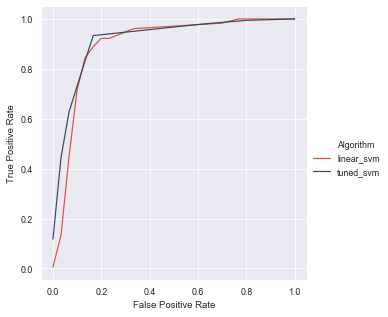

In [154]:
fatui = ["#e74c3c", "#34495e"]
sns.set_style('darkgrid')
sns.set_palette(fatui)
sns.set_context('paper')

g = sns.relplot(x = 'FPR', y = 'TPR' , data = df_2, kind = 'line', style='Algorithm', hue = 'Algorithm', ci = None, dashes = False, height = 4.5, aspect = 1)
g.set(xlabel = 'False Positive Rate', ylabel ='True Positive Rate')
plt.savefig('Roc svm.eps', format='eps')
plt.show()